Evaluation of the OI for the Shower Problem
-------------------------------------------

In [1]:
from pypo import multimodel_rep, OI_eval
import numpy as np

`polytope` failed to import `cvxopt.glpk`.


will use `scipy.optimize.linprog`


Defining the equations for the shower problem

$$
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 * u_1+120 * u_2\right)}{\left(u_1+u_2\right)} \\
\text { if } y_1=0 \rightarrow y_2=90
\end{array}\right.
$$

In [2]:
def shower_problem_2x2(u):
    y = np.zeros(2)
    y[0]=u[0]+u[1]
    if y[0]!=0:
        y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
    else:
        y[1]=(60+120)/2
        
    return y

Defining The AIS and DOS Bounds

In [3]:
DOS_bounds =  np.array([[10, 20], 
                        [70, 100]])

AIS_bounds =  np.array([[1, 10],
                        [1, 10]])

AIS_resolution =  [5, 5]

model =  shower_problem_2x2

Obtaining the AOS from the AIS

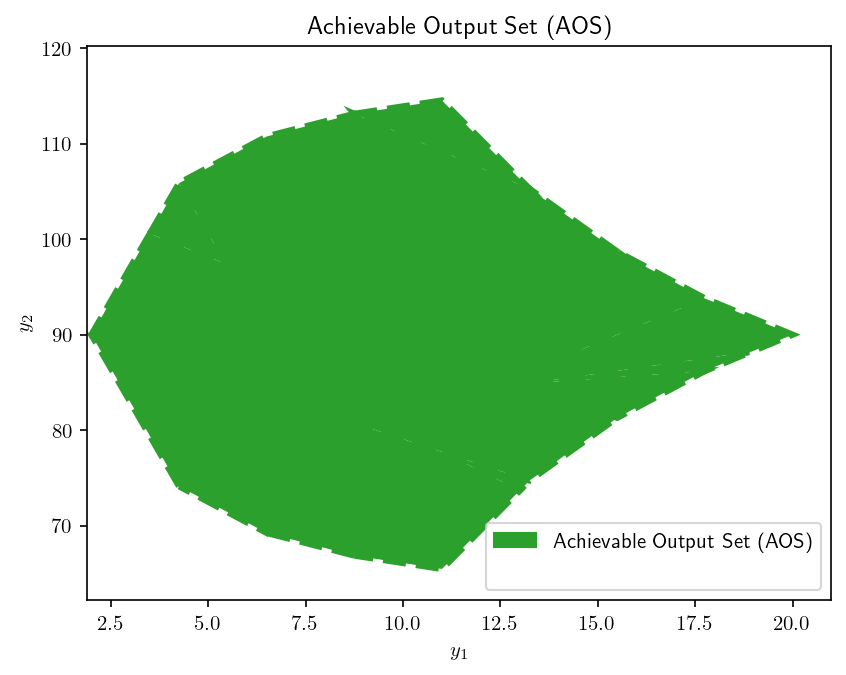

In [4]:
AOS_region  =  multimodel_rep(AIS_bounds, AIS_resolution, model)

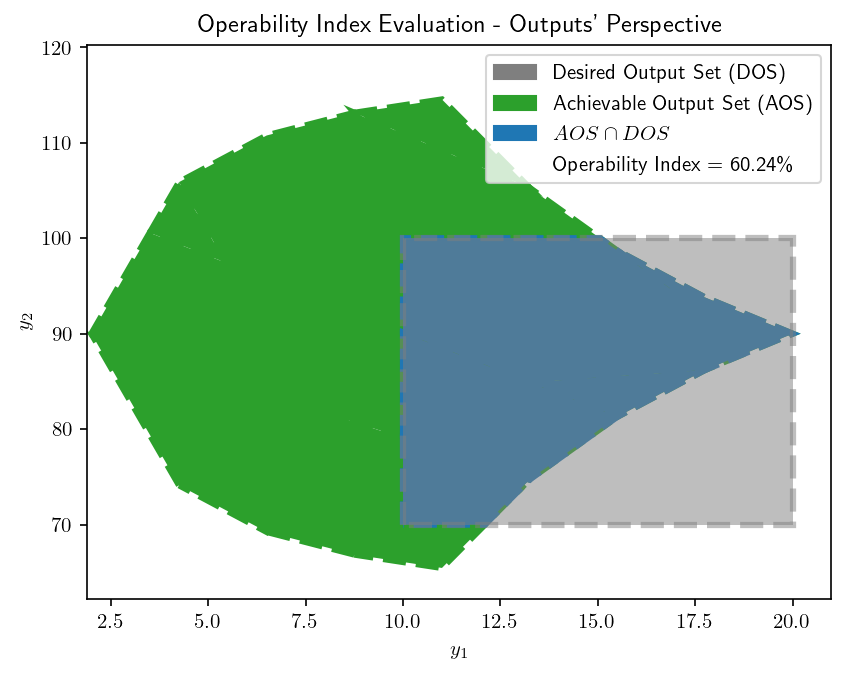

In [5]:
OI = OI_eval(AOS_region, DOS_bounds)